# Test Analytics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
basenames = [   'A2C_FullAction_Mlp',
                'A2C_FullAction_Mlp_Rew1',
                'A2C_FullAction_MlpLSTM',
                'A2C_PartialAction_Mlp',
                'A2C_PartialAction_Mlp_Rew1',
                'A2C_PartialAction_MlpLSTM',
                'PPO2_SimplifiedAction_MetaRL',
                'PPO2_SimplifiedAction_Mlp',
                'PPO2_SimplifiedAction_MlpLstm',
                'SAC_SimplifiedAction_LnMlp']
row_names = ['A2C-MLP_Full', 'A2C-MLP_Full_1', 'A2C-MLPLSTM_Full',
                'A2C-MLP_Partial', 'A2C-MLP_Partial_1', 'A2C-MLPLSTM_Partial',
                'PPO2-MetaRL', 'PPO2-MLPLSTM', 'PPO2-MLP', 'SAC-LNMLP']
column_names = ['Algorithm-Policy','total Reward (mean)', 
                'collisions (mean)',
                'goal distance (mean)', 'goal distance (std)']
trajectories = pd.read_csv(basenames[0]+'_episode_trajectory.csv')
trajectories.head()

,episode_number,timestep,waypoint_x,waypoint_y,car_pos_x,car_pos_y
0,1,1,30,0,-0.000215,-0.000143
1,1,2,30,0,-0.000209,-0.000154
2,1,3,30,0,-0.000206,-0.000154
3,1,4,30,0,-0.000203,-0.000155
4,1,5,30,0,-0.000202,-0.000155


## Generate trajectory paths

In [14]:
for i in range(10):
    trajectories = pd.read_csv(basenames[i]+'_episode_trajectory.csv')
    color = [str(item/120.) for item in trajectories['timestep']]
    #plt.figure(figsize=(20,10))
    fig, ax = plt.subplots(figsize=(20,10))

    circle1 = plt.Circle((30, 0), 12, color='r', fill=False)
    circle2 = plt.Circle((30, 0), 10, color='magenta', fill=False)
    circle3 = plt.Circle((30, 0), 1, color='b')
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)

    traj = plt.scatter(trajectories['car_pos_x'], trajectories['car_pos_y'], s=20, c=color)
    plt.scatter([30], [0], s=50, c=[str(200/255.)])
    plt.axis('equal')
    plt.xlim([-20,40])
    plt.ylim([-20, 20])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    cbar = plt.colorbar(traj)
    cbar.ax.set_yticklabels(['24','48','72','96','120'], fontsize=16)
    #plt.clim(0, 120)
    ax.set_facecolor((1.0, 1.0, 1.0))
    plt.title(row_names[i], fontsize=24)
    plt.savefig(basenames[i]+'_episode_trajectory.png', bbox_inches="tight", facecolor=fig.get_facecolor())
    plt.close()

### Sample path

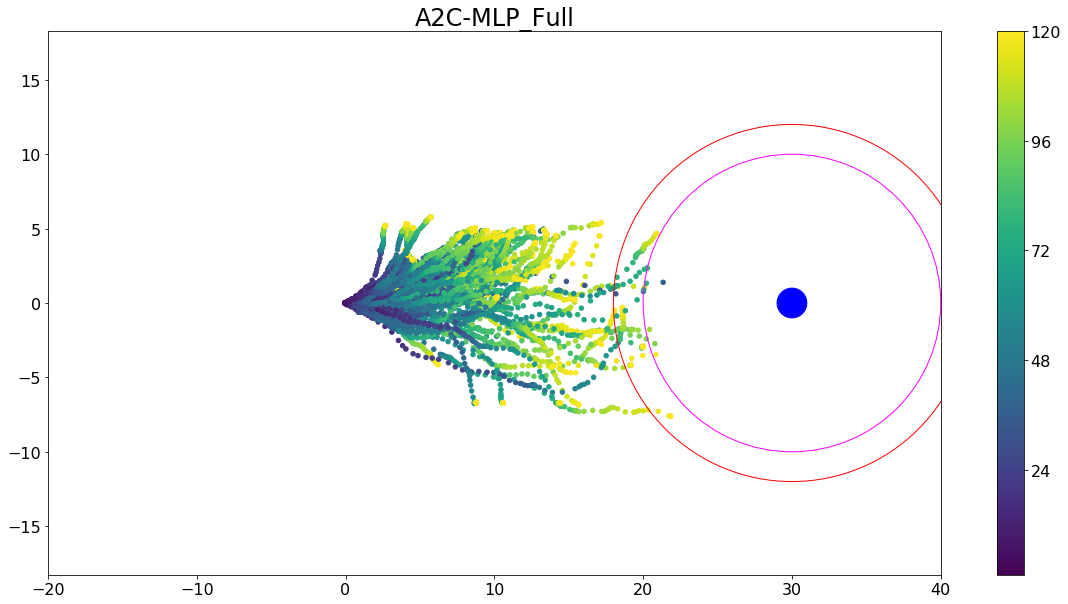

In [21]:
i = 0
trajectories = pd.read_csv(basenames[i]+'_episode_trajectory.csv')
color = [str(item/120.) for item in trajectories['timestep']]
#plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

circle1 = plt.Circle((30, 0), 12, color='r', fill=False)
circle2 = plt.Circle((30, 0), 10, color='magenta', fill=False)
circle3 = plt.Circle((30, 0), 1, color='b')
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

traj = plt.scatter(trajectories['car_pos_x'], trajectories['car_pos_y'], s=20, c=color)
plt.scatter([30], [0], s=50, c=[str(200/255.)])
plt.axis('equal')
plt.xlim([-20,40])
plt.ylim([-20, 20])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar(traj)
cbar.ax.set_yticklabels(['24','48','72','96','120'], fontsize=16)
#plt.clim(0, 120)
ax.set_facecolor((1.0, 1.0, 1.0))
plt.title(row_names[i], fontsize=24)
plt.show()

## Generate test summaries

In [84]:
stats = pd.read_csv(basenames[0]+'_episode_stats.csv')
stats.head()

,episode_number,total_reward,collisions,trajectory_distance,goal_distance
0,1,-72.238951,80,13.455799,19.325813
1,2,415.555545,25,13.648693,19.686279
2,3,-15.840945,80,15.262644,17.342969
3,4,424.034825,27,14.579051,18.035517
4,5,708.579056,0,21.004363,9.967006


In [85]:
stats.describe()

,episode_number,total_reward,collisions,trajectory_distance,goal_distance
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,408.155231,22.640000,21.171896,19.143567
std,29.011492,310.671787,27.632334,14.203967,4.950664
min,1.000000,-290.149645,0.000000,4.009017,8.767537
25%,25.750000,191.719408,0.000000,11.817540,16.385175
50%,50.500000,509.535825,9.500000,16.249504,19.532752
75%,75.250000,642.601106,43.000000,30.263205,22.286921
max,100.000000,1023.635611,89.000000,64.347056,27.816330


In [86]:
stats.describe()['total_reward']['mean']

408.155230884999

In [10]:
#row_names = ['A2C-MLP_Full', 'A2C-MLP_Full_1', 'A2C-MLPLSTM_Full',
#                'A2C-MLP_Partial', 'A2C-MLP_Partial_1', 'A2C-MLPLSTM_Partial',
#                'PPO2-MLP', 'PPO2-MLPLSTM', 'PPO2-MetaRL']
#column_names = ['Algorithm-Policy','total Reward (mean)', 
#                'collisions (mean)',
#                'goal distance (mean)', 'goal distance (std)']
stats_agg = pd.DataFrame(columns=column_names)

,Algorithm-Policy,total Reward (mean),collisions (mean),goal distance (mean),goal distance (std)


### Generate table of results

In [11]:
stats_tr, stats_col, stats_gdm, stats_gds = [], [], [], []
for i in range(10):
    stats = pd.read_csv(basenames[i]+'_episode_stats.csv')
    stats_tr.append(stats.describe()['total_reward']['mean'])
    stats_col.append(stats.describe()['collisions']['mean'])
    stats_gdm.append(stats.describe()['goal_distance']['mean'])
    stats_gds.append(stats.describe()['goal_distance']['std'])
stats_agg['Algorithm-Policy'] = row_names
stats_agg['total Reward (mean)'] = stats_tr
stats_agg['collisions (mean)'] = stats_col
stats_agg['goal distance (mean)'] = stats_gdm
stats_agg['goal distance (std)'] = stats_gds

stats_agg.round(decimals=2)

,Algorithm-Policy,total Reward (mean),collisions (mean),goal distance (mean),goal distance (std)
0,A2C-MLP_Full,408.16,22.64,19.14,4.95
1,A2C-MLP_Full_1,-323.08,18.17,25.11,2.84
2,A2C-MLPLSTM_Full,432.78,22.90,32.40,2.82
3,A2C-MLP_Partial,192.32,52.12,18.92,7.42
4,A2C-MLP_Partial_1,-1851.52,86.50,40.93,5.63
5,A2C-MLPLSTM_Partial,239.40,32.36,13.15,3.67
6,PPO2-MLP,-2.46,17.80,22.83,12.49
7,PPO2-MLPLSTM,-3.12,11.44,44.69,10.60
8,PPO2-MetaRL,-4.05,12.42,32.29,5.56
9,SAC-LNMLP,938.42,0.01,9.49,0.40
